In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Housing data

In [2]:
housing = pd.read_csv("housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Examining ocean_proximity in Housing data

<AxesSubplot:>

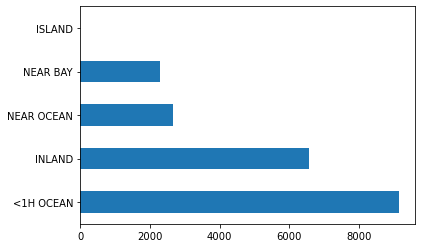

In [4]:
housing["ocean_proximity"].value_counts().plot(kind="barh")

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Making median income categories

In [6]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

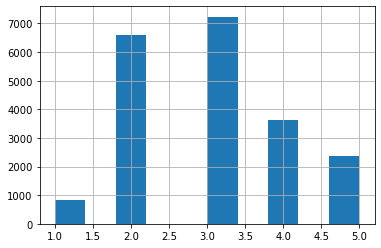

In [7]:
housing["income_cat"].hist()

## Defining Predictors and DV

In [8]:
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


# Split Dataset

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN,3
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN,3
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN,3
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN,2
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND,3
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN,5
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND,3
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN,2
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN,4


<AxesSubplot:>

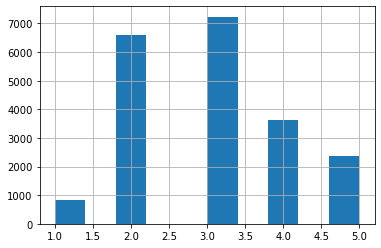

In [10]:
housing["income_cat"].hist()

<AxesSubplot:>

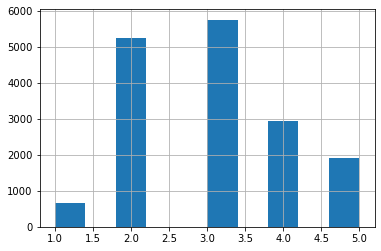

In [11]:
X_train["income_cat"].hist()

## Stratified Split

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [14]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [15]:
def income_cat_prop(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

cp = pd.DataFrame({
    "Overall": income_cat_prop(housing),
    "Stratified": income_cat_prop(strat_test_set),
    "Random": income_cat_prop(test_set),
}).sort_index()
cp["Rand. %error"] = 100 * cp["Random"] / cp["Overall"] - 100
cp["Strat. %error"] = 100 * cp["Stratified"] / cp["Overall"] - 100

cp

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [16]:
strat_train_set.drop("income_cat", axis="columns", inplace=True)
strat_test_set.drop("income_cat", axis="columns", inplace=True)

# Visualizing our Data

In [17]:
housing1 = strat_train_set.copy()

## Histograms

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

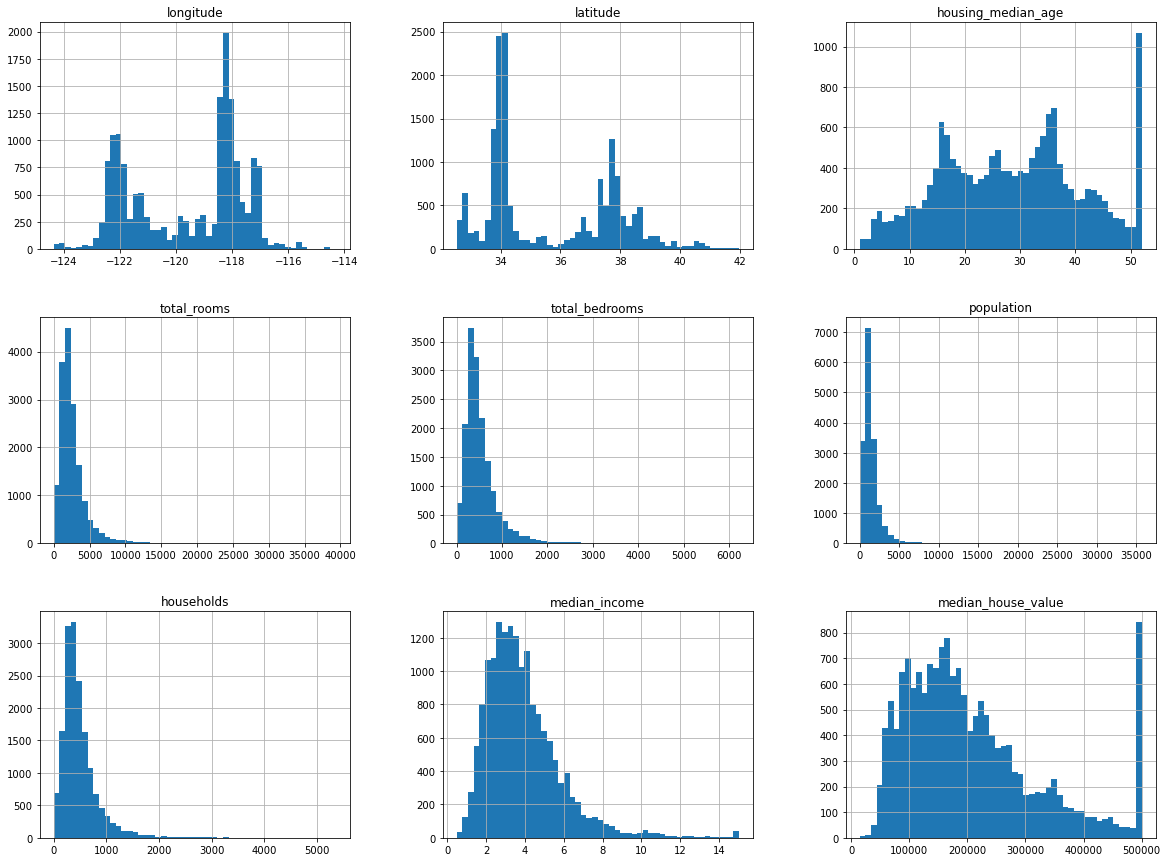

In [18]:
housing1.hist(bins=50, figsize=(20, 15))

<AxesSubplot:>

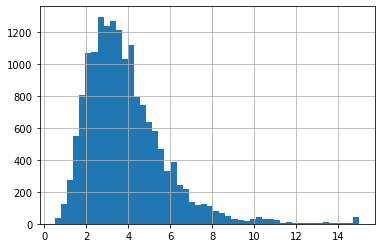

In [19]:
housing1["median_income"].hist(bins=50)

## Geographic Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

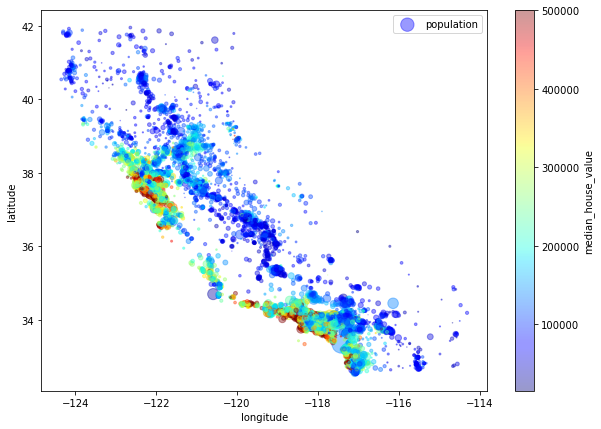

In [20]:
housing1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing1["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

## Correlation Matrices

In [21]:
housing1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


<AxesSubplot:>

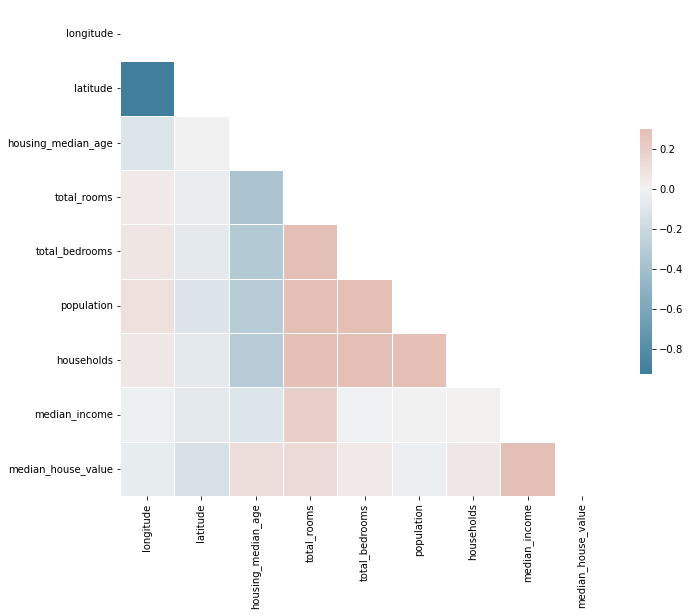

In [22]:
import seaborn as sns

corr = housing1.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Preparing Data for Machine Learning

In [23]:
housing1 = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

## Dealing with Missing Values

In [24]:
sample_miss = housing1[housing1.isnull().any(axis=1)].head()
sample_miss

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [25]:
med = housing1["total_bedrooms"].median()
sample_miss["total_bedrooms"].fillna(med, inplace=True) # option 3
sample_miss

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [27]:
housing_num = housing1.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [28]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [29]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [30]:
imputer.strategy

'median'

## Encode Categorical Variables

In [31]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [32]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Feature Engineering 

In [33]:
def fe(data):
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_rooms"] / data["households"]

    return data

In [34]:
housing_fe = fe(housing_num)
housing_fe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.128895,3.168555,5.485836
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,1.113281,2.623698,6.927083
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.033333,2.223333,5.393333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,1.074534,1.859213,3.886128
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.113793,3.167241,6.096552
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.229770,2.023976,6.658342
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.002821,3.363188,5.571932
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.965116,2.662791,4.110465
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.157685,2.411178,6.297405


## Scaling our Data

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_s = scaler.fit_transform(housing_fe)
housing_s

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.05896205,
         0.00622264,  0.01739526],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.02830837,
        -0.04081077,  0.56925554],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.1286475 ,
        -0.07537122, -0.01802432],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.26257303,
        -0.03743619, -0.5092404 ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.11548226,
        -0.05915604,  0.32814891],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.05505203,
         0.00657083,  0.01407228]])

In [36]:
housing1 = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

def data_trans(data):

    ### Separate Labels if they Exist ###

    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)
        
    else:
        labels = None

    ### Feature Engineering ###
    fe_data = fe(data)
    features = list(fe_data.columns) # Creating a list of our features for future use

    ### Imputing Data ###
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")

    housing_num = fe_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)

    ### Encoding Categorical Data ###
    housing_cat = fe_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity") # We're encoding this variable, so we don't need it in our list anymore


    ### Scaling Numerical Data ###
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    housing_s = scaler.fit_transform(imputed)

    ### Concatening all Data ###
    output = np.hstack([housing_s, housing_cat_1hot])

    return output, labels, features

# Trying ML Model

In [37]:
train_data, train_labels, features= data_trans(strat_train_set)
train_data

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [38]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_household',
 'population_per_household',
 'rooms_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [39]:
test_data, test_labels, features = data_trans(strat_test_set)
test_data

array([[ 0.57507019, -0.69657252,  0.0329564 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.43480141, -0.33466769, -0.36298077, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81385757, -0.92687559,  0.11214383, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49049967, -0.66367208,  0.58726843, ...,  0.        ,
         0.        ,  0.        ]])

## Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_data, train_labels)

LinearRegression()

In [41]:
original_values = test_labels[:5]

predict = lr.predict(test_data[:5])

comparison = pd.DataFrame(data={"Original Values":original_values, "Predicted Values":predict})

comparison["Differences"] = comparison["Original Values"] - comparison["Predicted Values"]

comparison

,Original Values,Predicted Values,Differences
5241,500001.0,421436.985982,78564.014018
17352,162500.0,288955.577066,-126455.577066
3505,204600.0,244465.297215,-39865.297215
7777,159700.0,195506.027223,-35806.027223
14155,184000.0,259951.750767,-75951.750767


In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69173.589777
std       2423.038289
min      64914.420793
25%      67463.260691
50%      69278.000801
75%      70500.050983
max      72778.868826
dtype: float64

In [43]:
from sklearn.metrics import mean_squared_error

lr_mse = mean_squared_error(original_values, predict)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

78489.8709666808

In [44]:
# Bring in the Metrics

from sklearn.metrics import mean_absolute_error

lr_mae = mean_absolute_error(original_values, predict)
lr_mae

71328.53325778323

## Decision Tree Regressor

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=42)

In [46]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [48]:
def scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

scores(tree_rmse_scores)

Scores: [70819.83674558 70585.09139446 69861.50467212 73083.46385442
 66246.62162221 74093.76616605 77298.21284135 70265.05374821
 70413.46481703 72693.02785945]
Mean: 71536.00437208822
Standard deviation: 2802.723447985299


## Random Forest Regressor

In [49]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.arange(2,101)]

max_features = ['sqrt','log2',1.0]

criterion = ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']

max_depth = [int(x) for x in np.arange(2,51,2)]
max_depth.append(None)


min_samples_split = [int(x) for x in np.arange(2,51,2)]

min_samples_leaf = [int(x) for x in np.arange(2,51,2)]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'max_features': ['sqrt', 'log2', 1.0], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, None], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50], 'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50], 'bootstrap': [True, False]}


In [50]:
# Use the random grid to search for best hyperparameters
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_reg_bestfit = RandomizedSearchCV(estimator = forest_reg, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

forest_reg_bestfit.fit(train_data, train_labels)

print(forest_reg_bestfit.best_params_) # These are the parameters that we are setting to our model to get the best possible accuracy

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 54, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


### Applying Optimal Hyperparameters fine-tuned for Random Forest Regressor

In [51]:
forest_reg =  RandomForestRegressor(n_estimators=54,
                                    min_samples_split= 18,
                                    min_samples_leaf= 2,
                                    max_features= 'sqrt',
                                    max_depth= None,
                                    bootstrap= False,
                                    random_state=42)

forest_reg.fit(train_data, train_labels)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=18, n_estimators=54, random_state=42)

In [52]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

28129.582675593712

In [53]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_data, train_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
scores(forest_rmse_scores)

Scores: [50776.36660546 48050.57011729 45544.69218876 50169.7425565
 47875.51243983 48896.20591443 50706.33026272 48949.99047158
 47571.78116733 52944.30354301]
Mean: 49148.54952669158
Standard deviation: 1973.0768965318564
